To perform various computations, first load the required libraries in python

In [181]:
# import 'numpy' to compute high-level mathematics functions 
import numpy as np

# import 'pandas' to perform data manipulation
import pandas as pd

# import 'matplotlib.pyplot' for visualization
import matplotlib.pyplot as plt

# import 'seaborn' for high-level statistical graphics
import seaborn as sns

# to ignore the warnings run the following code
import warnings
warnings.filterwarnings("ignore")

# run below code to convert the 'exponential' values to float
np.set_printoptions(suppress = True)

# import functions from sklearn to perform clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

In [182]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

#### Read the dataset and print the first five observations.

In [183]:
# load the excel file
# store the data in 'df_prod'
df_prod = pd.read_csv('ML3 data.csv')

# display first two observations using head()
df_prod.head(2)

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,ar16,ar17,ar18,ar19,ar20,ar21,ar22,ar23,ar24,ar25
0,73557,8,2,1,69,NaN,4,4,1,NaN,...,1.470207,4.864849,3.636711,-9.174492,-9.353410,5.153847,1.294983,-1.015693,-8.671692,5.423061
1,73558,8,2,1,54,NaN,3,3,1,NaN,...,-7.363791,-2.566326,0.776046,-2.951925,-0.538597,3.770290,6.711471,3.521875,-1.765809,-5.383746


In [184]:
df_prod.shape

(9813, 662)

In [185]:
df_prod.describe()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,ar16,ar17,ar18,ar19,ar20,ar21,ar22,ar23,ar24,ar25
count,9813.000000,9813.0,9813.0,9813.000000,9813.000000,642.000000,9813.000000,9813.000000,9813.000000,4213.000000,...,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000
mean,78644.559971,8.0,2.0,1.507694,31.629573,10.258567,3.083766,3.277897,1.508509,107.478519,...,-1.868362,-3.024976,0.103960,1.732914,-2.639643,0.516211,0.847771,0.436837,-2.754273,2.018194
std,2938.592266,0.0,0.0,0.499966,24.397553,6.815038,1.262812,1.607957,0.499953,69.774776,...,5.689419,5.572118,5.621485,4.612798,7.025533,5.099966,7.074776,5.891879,5.608956,4.114095
min,73557.000000,8.0,2.0,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,-9.932773,-9.742275,-9.504686,-9.936065,-9.915099,-9.905405,-9.646950,-9.329935,-9.574369,-9.877965
25%,76092.000000,8.0,2.0,1.000000,10.000000,5.000000,2.000000,2.000000,1.000000,45.000000,...,-7.164033,-8.291340,-6.029267,-1.014871,-9.200133,-2.849344,-8.087627,-6.434927,-7.405031,-0.326282
50%,78643.000000,8.0,2.0,2.000000,27.000000,9.000000,3.000000,3.000000,2.000000,103.000000,...,-3.237602,-4.672666,0.173614,1.830624,-5.338621,1.884456,0.814447,-0.763828,-4.263325,1.885457
75%,81191.000000,8.0,2.0,2.000000,52.000000,16.000000,4.000000,4.000000,2.000000,166.000000,...,1.883083,2.533461,5.417423,4.025792,1.521804,5.003854,8.079576,7.174353,1.071647,4.904403
max,83731.000000,8.0,2.0,2.000000,80.000000,24.000000,5.000000,7.000000,2.000000,239.000000,...,9.984094,10.010548,9.933308,9.580645,9.837051,9.202594,9.679657,8.967017,9.944636,8.362119


Let's check the data types

In [186]:
df_prod.dtypes.value_counts()

float64    641
int64       21
dtype: int64

all are numerical variables

SEQN is the id of respondent which needs to be clustered, so lets make index out of it and remove from fields

In [187]:
df = df_prod.SEQN.value_counts() > 1

In [188]:
df_prod.index = df_prod['SEQN']

In [189]:
df_prod.drop('SEQN',axis=1,inplace=True)

In [190]:
df_prod.head(2)

,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,...,ar16,ar17,ar18,ar19,ar20,ar21,ar22,ar23,ar24,ar25
SEQN,,,,,,,,,,,,,,,,,,,,,
73557,8,2,1,69,NaN,4,4,1,NaN,1.0,...,1.470207,4.864849,3.636711,-9.174492,-9.353410,5.153847,1.294983,-1.015693,-8.671692,5.423061
73558,8,2,1,54,NaN,3,3,1,NaN,2.0,...,-7.363791,-2.566326,0.776046,-2.951925,-0.538597,3.770290,6.711471,3.521875,-1.765809,-5.383746


In [191]:
df.value_counts()

False    9813
Name: SEQN, dtype: int64

all the records are from unique respondents

Let's do outlier analysis

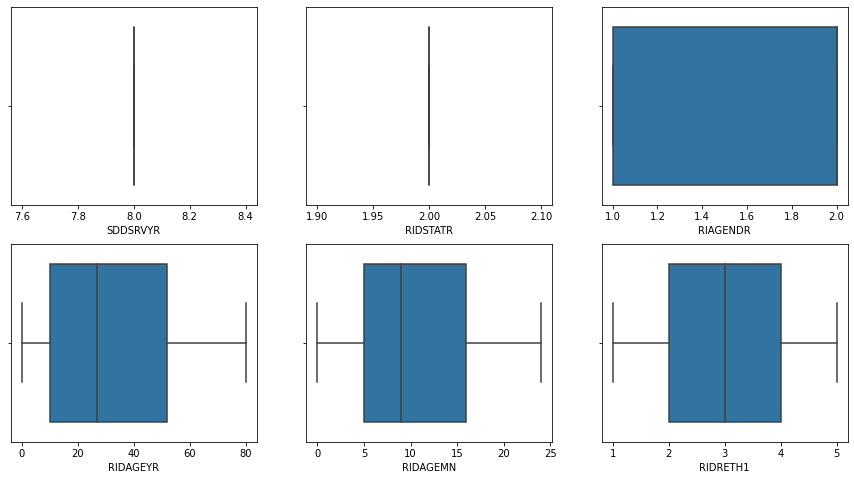

In [192]:
# plot the boxplot for each numerical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 8))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_prod.columns, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df_prod[variable], ax = subplot)

# display the plot
plt.show()

outliers are not present

let's check the extent of missing values in feature, if more 30% then remove that feature as insignificant one

In [193]:
insignificant_feat = []

In [194]:
df = df_prod.iloc[:,0:50].isna().sum()/len(df_prod.iloc[:,0:50])*100 > 30

In [195]:
insignificant_feat.extend([x for x in df[df==True].index])

In [196]:
df = df_prod.iloc[:,50:100].isna().sum()/len(df_prod.iloc[:,50:100])*100 > 30

In [197]:
insignificant_feat.extend([x for x in df[df==True].index])

In [198]:
df = df_prod.iloc[:,100:150].isna().sum()/len(df_prod.iloc[:,100:150])*100 > 30

In [199]:
insignificant_feat.extend([x for x in df[df==True].index])

In [200]:
df = df_prod.iloc[:,150:200].isna().sum()/len(df_prod.iloc[:,150:200])*100 > 30

In [201]:
insignificant_feat.extend([x for x in df[df==True].index])

In [202]:
df = df_prod.iloc[:,200:250].isna().sum()/len(df_prod.iloc[:,200:250])*100 > 30

In [203]:
insignificant_feat.extend([x for x in df[df==True].index])

In [204]:
df = df_prod.iloc[:,250:300].isna().sum()/len(df_prod.iloc[:,250:300])*100 > 30

In [205]:
insignificant_feat.extend([x for x in df[df==True].index])

In [206]:
df = df_prod.iloc[:,300:350].isna().sum()/len(df_prod.iloc[:,300:350])*100 > 30

In [207]:
insignificant_feat.extend([x for x in df[df==True].index])

In [208]:
df = df_prod.iloc[:,350:400].isna().sum()/len(df_prod.iloc[:,350:400])*100 > 30

In [209]:
insignificant_feat.extend([x for x in df[df==True].index])

In [210]:
df = df_prod.iloc[:,400:450].isna().sum()/len(df_prod.iloc[:,400:450])*100 > 30

In [211]:
insignificant_feat.extend([x for x in df[df==True].index])

In [212]:
df = df_prod.iloc[:,450:500].isna().sum()/len(df_prod.iloc[:,450:500])*100 > 30

In [213]:
insignificant_feat.extend([x for x in df[df==True].index])

In [214]:
df = df_prod.iloc[:,550:600].isna().sum()/len(df_prod.iloc[:,550:600])*100 > 30

In [215]:
insignificant_feat.extend([x for x in df[df==True].index])

In [216]:
df = df_prod.iloc[:,600:].isna().sum()/len(df_prod.iloc[:,600:])*100 > 30

In [217]:
insignificant_feat.extend([x for x in df[df==True].index])

In [218]:
len(insignificant_feat)

416

416 features are having more than 30% mising values, so lets remove these features

In [219]:
df_prod.drop(insignificant_feat,axis=1,inplace=True)

In [254]:
df_prod.shape

(9813, 245)

Let's impute missing values in remaining feaures with their means

In [262]:
df_prod.fillna(df_prod.mean(),inplace=True)

In [263]:
df_prod.shape

(9813, 245)

In [265]:
df_prod.isna().sum()

SDDSRVYR    0
RIDSTATR    0
RIAGENDR    0
RIDAGEYR    0
RIDRETH1    0
           ..
ar21        0
ar22        0
ar23        0
ar24        0
ar25        0
Length: 245, dtype: int64

Let's scale the data

In [266]:
features = df_prod

In [267]:
# instantiate the 'StandardScaler'
scaler = StandardScaler()

# fit_transform() transforms the data by first computing the mean and sd and later scaling the data
# name the standardized data as 'features_scaled'
features_scaled = scaler.fit_transform(features)

Build the Model

In [268]:
# instantiate linkage object with scaled data and consider 'ward' linkage method 
link_mat = linkage(features_scaled, method = 'ward')     

# print first 10 observations of the linkage matrix 'link_mat'
print(link_mat[0:10])

[[1197.         2670.            0.01011087    2.        ]
 [ 414.         5270.            0.01220244    2.        ]
 [4678.         9803.            0.01478868    2.        ]
 [6609.         7357.            0.08266797    2.        ]
 [ 953.         5937.            0.12601901    2.        ]
 [4997.         6045.            0.19991107    2.        ]
 [4574.         5115.            0.20074294    2.        ]
 [2601.         7258.            0.20945174    2.        ]
 [4263.         6557.            0.24161628    2.        ]
 [1072.         1747.            0.28244336    2.        ]]


Plot the Dendrogram

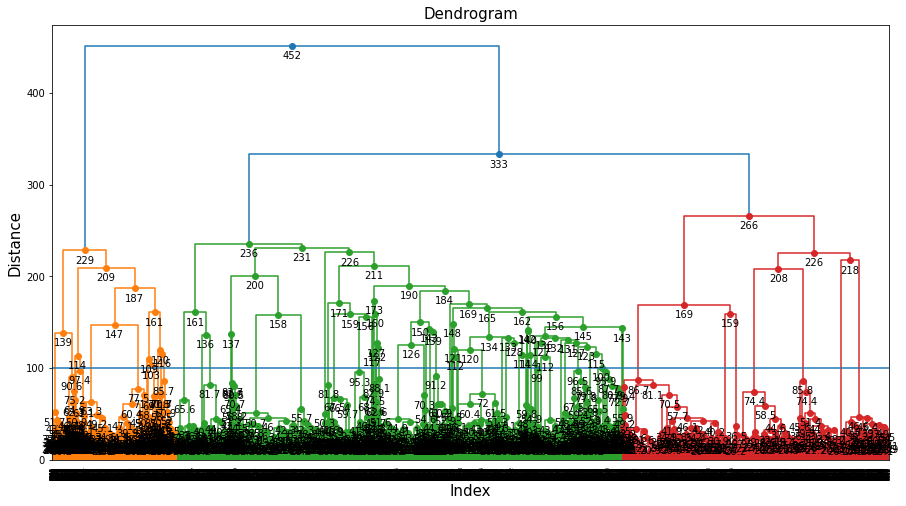

In [269]:
# plot the dendrogram
# pass the linkage matrix
dendro = dendrogram(link_mat)

# annotate the distance on the y-axis for distance > 20
# 'dendro' returns the dictionary containing x,y coordinates and the color list for each merge
# the 'icoord' returns the x-coordinates for the rectangle that represents the merging
# the 'dcoord' returns the y-coordinates (distance) for the each corner of the rectangle that represents the merging
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    
    # consider 'x' as the x-coordinate of the average distance on the merging line
    x = sum(i[1:3])/2
    
    # consider 'y' as the distance at which the merging occurs 
    y = d[1]
    
    # pass the if-condition for annotation
    if y > 20:
        
        # plot the bullet and annotate the merging distance 'y'
        plt.plot(x, y, 'o', c=c)
        
        # pass the conditions to annotate the distance
        plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')

        
# plot the line to cut the dendrogram
plt.axhline(y = 100)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Dendrogram', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)

# display the plot
plt.show()

#### Let us calculate the Cophenetic correlation coefficient to study the quality of clusters formed using dendrogram.

In [272]:
# calculate the euclidean distance between the observations 
eucli_dist = euclidean_distances(features_scaled)

# the above code will return the matrix of 5192x5192
# consider only the array of upper triangular matrix
# k=1 considers the upper triangular values without the diagonal elements
dist_array = eucli_dist[np.triu_indices(9813, k = 1)]

# pass the linkage matrix and actual distance
# 1st output of the cophenet() is the correlation coefficient
coeff, cophenet_dist = cophenet(link_mat, dist_array)

# print the cophenetic correlation coefficient
print(coeff)

0.15517914219820664


**Interpretation:** The value of cophenetic correlation coefficient is 0.155. The value close to 1 indicates the best linkage quality. Here we can say that the linkage quality is not good.

Silhouette Score Method

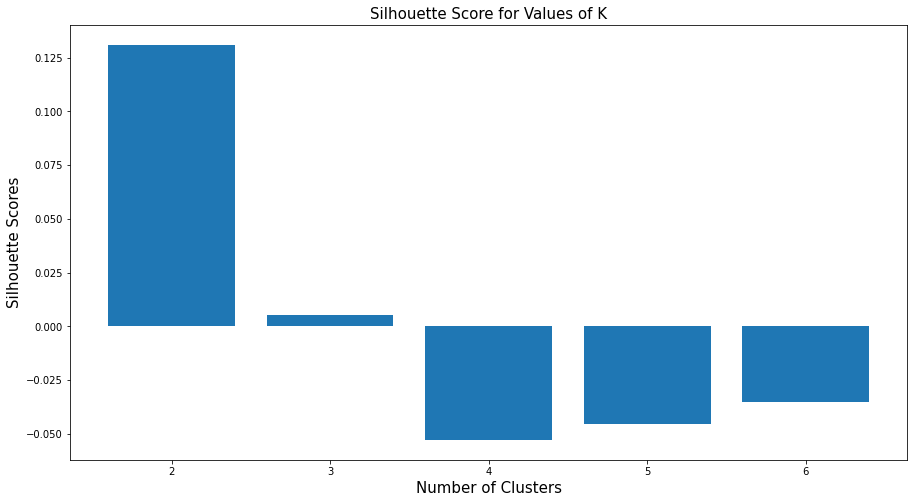

In [273]:
# consider different values of K
K = [2,3,4,5,6]

# consider an empty list tot store the Silhouette score
silhouette_scores = [] 

# consider a for loop to perform clustering for different values of K
for i in K:
    
    # instantiate clustering for each value of K
    model = AgglomerativeClustering(n_clusters = i) 
    
    # calculate the Silhouette score and append to the list 'silhouette_scores'
    silhouette_scores.append(silhouette_score(features_scaled, model.fit_predict(features_scaled))) 
    
# plot the Silhouette score for different K
plt.bar(K, silhouette_scores) 

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15) 
plt.ylabel('Silhouette Scores', fontsize = 15)

# display the plot
plt.show()

In [274]:
silhouette_scores

[0.13104360042764762,
 0.00509687918403916,
 -0.05284914943257803,
 -0.04553522240474204,
 -0.034994349452017876]

**Interpretation:** The above plot shows that the Silhouette score for K = 2 is the highest. This imlpies that K = 2 is the optimal value for number of clusters.

Both the dendrogram and Silhouette score method returns K = 2 as the optimal value for the number of clusters. Now we retrieve the clusters and let us visualize the data.

Let us use `AgglomerativeClustering()` to form two clusters. 

In [275]:
# instantiate clustering method with 2 clusters and 'ward' linkage method
clusters = AgglomerativeClustering(n_clusters=2, linkage='ward')

# fit the model on the scaled data
clusters.fit(features_scaled)

AgglomerativeClustering()

In [276]:
# add a column containing cluster number to the original data
df_prod['Cluster'] = clusters.labels_

# print head() of the newly formed dataframe
df_prod.head()

,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,DMDCITZN,SIALANG,...,ar17,ar18,ar19,ar20,ar21,ar22,ar23,ar24,ar25,Cluster
SEQN,,,,,,,,,,,,,,,,,,,,,
73557,8,2,1,69,4,4,1,1,1.0,1,...,4.864849,3.636711,-9.174492,-9.353410,5.153847,1.294983,-1.015693,-8.671692,5.423061,0
73558,8,2,1,54,3,3,1,1,1.0,1,...,-2.566326,0.776046,-2.951925,-0.538597,3.770290,6.711471,3.521875,-1.765809,-5.383746,1
73559,8,2,1,72,3,3,2,1,1.0,1,...,-9.730452,9.906254,7.636725,-7.642553,7.356881,-9.626078,3.871285,-1.673816,-3.973037,0
73560,8,2,1,9,3,3,1,1,1.0,1,...,-8.283262,0.184733,1.245878,-9.309774,1.965447,-8.320304,-6.444928,-4.297771,1.870141,0
73561,8,2,2,73,3,3,1,1,1.0,1,...,-8.721841,0.013319,3.599418,9.263045,4.388852,6.608509,-6.813265,-9.492588,-0.342957,0


In [277]:
# check the size of each cluster
df_prod['Cluster'].value_counts()

0    8338
1    1475
Name: Cluster, dtype: int64

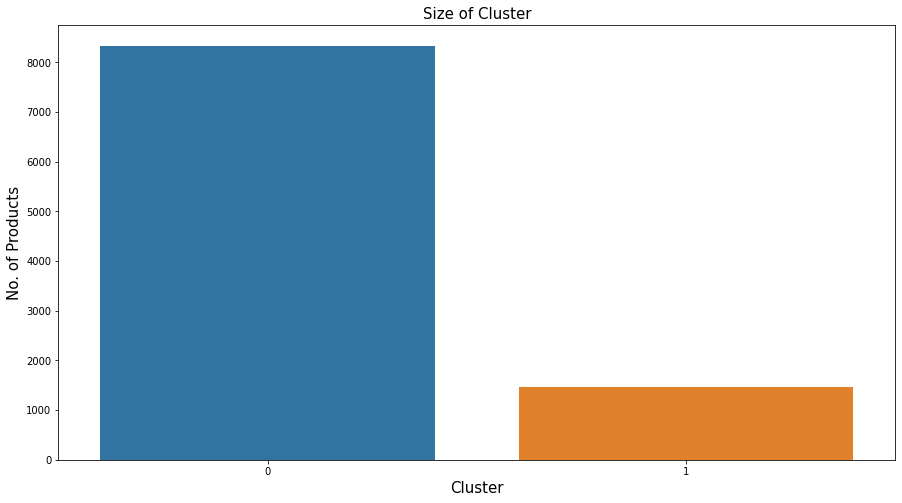

In [278]:
# plot the countplot for the cluster size
sns.countplot(data = df_prod, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('No. of Products', fontsize = 15)

# display the plot
plt.show()

DBSCAN

In [279]:
# instantiate DBSCAN with epsilon and minimum points 
# pass the epsilon radius for neighbourhood
# pass the number of minimum points
model = DBSCAN(eps = 0.8, min_samples = 15)

# fit the model on the scaled data
model.fit(features_scaled)

DBSCAN(eps=0.8, min_samples=15)

In [281]:
# display the unique clusters formed by DBSCAN
(set(model.labels_))

{-1}

**Interpretation**: The data points labeled as `-1` are the `outliers` identified by DBSCAN.

kMeans cluster

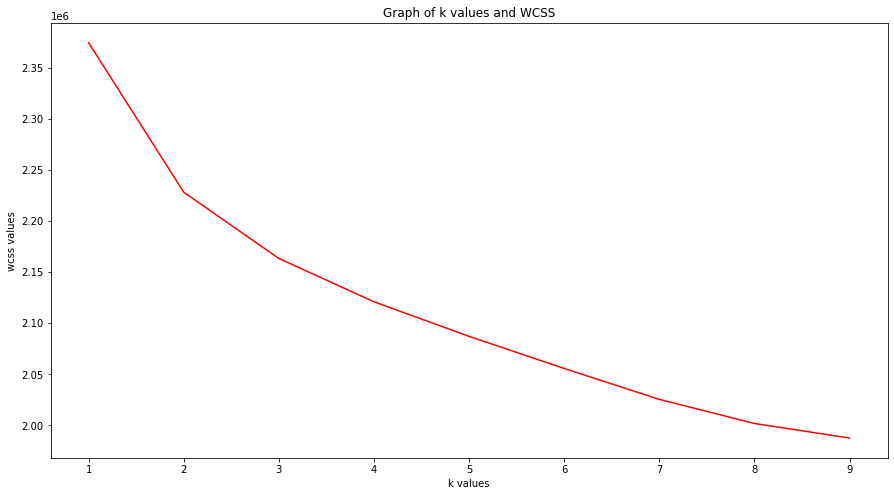

In [284]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

From the above plot we can see either 2 clusters would be appropriate for the data. Given what we know about the original classes, this seems about appropriate.

Let's apply feature extraction logic on scaled features

In [285]:
from sklearn.decomposition import PCA

In [286]:
# covariance matrix
cov_matrix = np.cov(features_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          1.00010192 ... -0.12598497 -0.10114005
   0.03213616]
 ...
 [ 0.          0.         -0.12598497 ...  1.00010192  0.52370902
   0.29485346]
 [ 0.          0.         -0.10114005 ...  0.52370902  1.00010192
   0.3267225 ]
 [ 0.          0.          0.03213616 ...  0.29485346  0.3267225
   1.00010192]]


In [287]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [288]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.          0.          0.         ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [-0.04502675 -0.01979525  0.03562562 ...  0.          0.
   0.        ]
 ...
 [ 0.04303479 -0.09262883 -0.18868091 ...  0.          0.
   0.        ]
 [ 0.03096892 -0.01574475 -0.07587327 ...  0.          0.
   0.        ]
 [-0.01657415  0.03367015 -0.16360906 ...  0.          0.
   0.        ]]

 Eigen Values 
%s [25.38638393  9.33029392  5.8387102   5.5138035   4.88022487  4.72523317
  4.47105843  4.11930987  3.84693096  3.70257879  3.63068564  3.51954056
  3.3286079   3.16870908  3.1059127   2.949376    2.87222504  2.66766026
  2.63536528  2.51935628  2.42437991  2.26124247  2.23478548  2.19789585
  2.14409544  2.06720206  2.06983894  2.00238533  1.9150665   1.88235444
  1.84580205  1.81523091  1.79104827  1.73407881  1.71280919  1.67343429
  1.65014649  1.61097306  1.58572659  1.49429148  1.48665126  1.46140613
  1.4559

In [298]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained\n", cum_var_exp)

Cumulative Variance Explained
 [ 10.48917228  14.34427274  16.75671704  19.03491605  21.05133239
  23.0037091   24.85106564  26.55308633  28.14256523  29.67240055
  31.17253099  32.62673839  34.00205603  35.31130651  36.59461072
  37.81323694  38.99998584  40.10221246  41.1910954   42.23204562
  43.23375341  44.16805591  45.09142688  45.99955575  46.88545531
  47.7406735   48.59480218  49.42214981  50.21341896  50.99117211
  51.7538225   52.50384148  53.24386865  53.96035712  54.66805738
  55.35948869  56.04129791  56.70692142  57.36211357  57.97952647
  58.59378257  59.19760786  59.79918402  60.39366372  60.97938037
  61.55940359  62.13034887  62.69035593  63.23838916  63.78072707
  64.31321344  64.83641376  65.35068305  65.85158483  66.34403578
  66.82835173  67.30996518  67.78594133  68.25876506  68.72535536
  69.18496117  69.64108932  70.09512159  70.54549742  70.9924652
  71.4310138   71.86322816  72.29232912  72.71722107  73.1365101
  73.55537692  73.97320169  74.38831906  74.801

From abobe it can be seen that first 140 principal components can explain up to 95% of variability

In [299]:
pca1 = PCA(n_components=145).fit_transform(features_scaled)

In [300]:
pca1

array([[-2.61019266, -2.07593931,  0.80666049, ...,  0.64323766,
        -0.54419349,  0.46464138],
       [20.34504605,  1.11331673,  2.41297908, ...,  0.47265473,
        -1.06592616, -0.5089863 ],
       [ 0.23468724, -3.79685868, -1.4593889 , ...,  0.03941119,
        -0.07984792, -0.88420306],
       ...,
       [ 4.58561637, -1.72652522,  1.57065685, ...,  0.05083392,
        -0.13125585,  0.15734741],
       [-0.62651761,  3.47411081,  0.12860674, ...,  0.20565671,
        -0.11625133,  0.12374164],
       [ 3.66953148,  2.68015296,  0.01959533, ..., -0.15184494,
        -0.64637653,  0.56705112]])

Build the Model

In [301]:
# instantiate linkage object with scaled data and consider 'ward' linkage method 
link_mat = linkage(pca1, method = 'ward')     

# print first 10 observations of the linkage matrix 'link_mat'
print(link_mat[0:10])

[[1197.         2670.            0.00681691    2.        ]
 [ 414.         5270.            0.00936493    2.        ]
 [4678.         9803.            0.01268829    2.        ]
 [6609.         7357.            0.03693436    2.        ]
 [ 953.         5937.            0.11950192    2.        ]
 [4997.         6045.            0.13699119    2.        ]
 [4263.         6557.            0.16163968    2.        ]
 [2601.         7258.            0.16620647    2.        ]
 [4574.         5115.            0.19384784    2.        ]
 [1072.         1747.            0.26875176    2.        ]]


Plot the Dendrogram

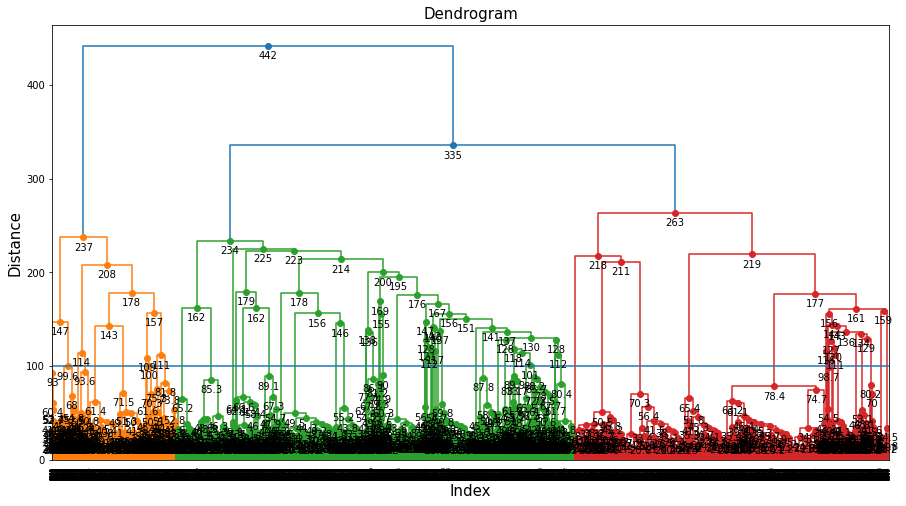

In [302]:
# plot the dendrogram
# pass the linkage matrix
dendro = dendrogram(link_mat)

# annotate the distance on the y-axis for distance > 20
# 'dendro' returns the dictionary containing x,y coordinates and the color list for each merge
# the 'icoord' returns the x-coordinates for the rectangle that represents the merging
# the 'dcoord' returns the y-coordinates (distance) for the each corner of the rectangle that represents the merging
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    
    # consider 'x' as the x-coordinate of the average distance on the merging line
    x = sum(i[1:3])/2
    
    # consider 'y' as the distance at which the merging occurs 
    y = d[1]
    
    # pass the if-condition for annotation
    if y > 20:
        
        # plot the bullet and annotate the merging distance 'y'
        plt.plot(x, y, 'o', c=c)
        
        # pass the conditions to annotate the distance
        plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')

        
# plot the line to cut the dendrogram
plt.axhline(y = 100)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Dendrogram', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)

# display the plot
plt.show()

#### Let us calculate the Cophenetic correlation coefficient to study the quality of clusters formed using dendrogram.

In [303]:
# calculate the euclidean distance between the observations 
eucli_dist = euclidean_distances(pca1)

# the above code will return the matrix of 9813x9813
# consider only the array of upper triangular matrix
# k=1 considers the upper triangular values without the diagonal elements
dist_array = eucli_dist[np.triu_indices(9813, k = 1)]

# pass the linkage matrix and actual distance
# 1st output of the cophenet() is the correlation coefficient
coeff, cophenet_dist = cophenet(link_mat, dist_array)

# print the cophenetic correlation coefficient
print(coeff)

0.1728772928651563


**Interpretation:** The value of cophenetic correlation coefficient is 0.172 The value close to 1 indicates the best linkage quality. Here we can say that the linkage quality is not good.

Silhouette Score Method

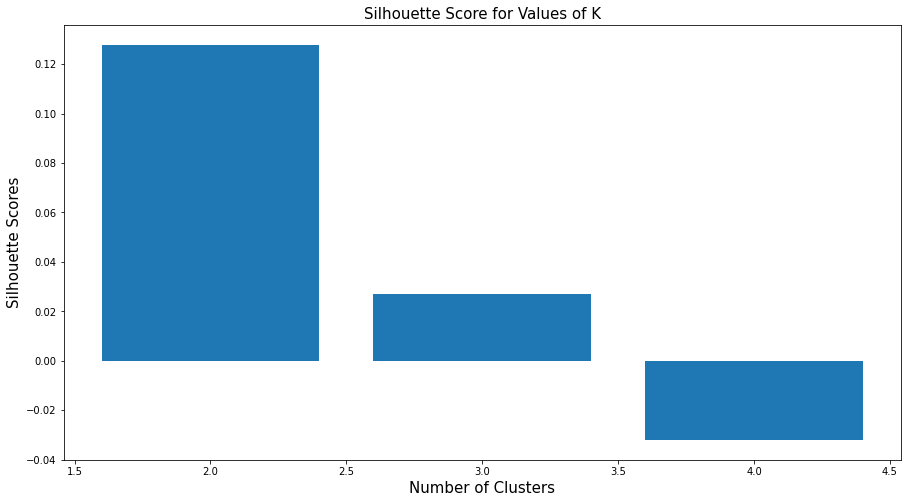

In [307]:
# consider different values of K
K = [2,3,4]

# consider an empty list tot store the Silhouette score
silhouette_scores = [] 

# consider a for loop to perform clustering for different values of K
for i in K:
    
    # instantiate clustering for each value of K
    model = AgglomerativeClustering(n_clusters = i) 
    
    # calculate the Silhouette score and append to the list 'silhouette_scores'
    silhouette_scores.append(silhouette_score(pca1, model.fit_predict(pca1))) 
    
# plot the Silhouette score for different K
plt.bar(K, silhouette_scores) 

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15) 
plt.ylabel('Silhouette Scores', fontsize = 15)

# display the plot
plt.show()

In [308]:
silhouette_scores

[0.1278715758432409, 0.027090570321852095, -0.03206283105038931]

**Interpretation:** The above plot shows that the Silhouette score for K = 2 is the highest. This imlpies that K = 2 is the optimal value for number of clusters.

Both the dendrogram and Silhouette score method returns K = 2 as the optimal value for the number of clusters. Now we retrieve the clusters and let us visualize the data.

Let's apply feature extraction logic on scaled features using SVD

In [310]:
from sklearn.decomposition import TruncatedSVD

In [339]:
#Fitting the SVD class
trun_svd =  TruncatedSVD(n_components = 100)
svd1 = trun_svd.fit_transform(features_scaled)

In [340]:
svd1

array([[-2.61019267, -2.07593931,  0.806668  , ..., -0.06416472,
         0.70553198,  0.53509759],
       [20.34504611,  1.11331712,  2.41298424, ...,  0.02338976,
        -1.47245608, -0.07859021],
       [ 0.23468725, -3.79685959, -1.45938587, ...,  0.02844613,
         0.9209587 , -1.23634594],
       ...,
       [ 4.58561637, -1.72652565,  1.57065939, ..., -0.51209789,
        -0.37803698,  0.21530753],
       [-0.62651761,  3.47411085,  0.12860634, ...,  0.13181984,
        -0.5344967 , -0.84900051],
       [ 3.66953145,  2.68015338,  0.01960472, ..., -0.75710144,
        -0.10811149, -0.80666721]])

Build the Model

In [341]:
# instantiate linkage object with scaled data and consider 'ward' linkage method 
link_mat = linkage(svd1, method = 'ward')     

# print first 10 observations of the linkage matrix 'link_mat'
print(link_mat[0:10])

[[1197.         2670.            0.00559434    2.        ]
 [ 414.         5270.            0.00729956    2.        ]
 [4678.         9803.            0.0109959     2.        ]
 [6609.         7357.            0.03420961    2.        ]
 [ 953.         5937.            0.11616859    2.        ]
 [4997.         6045.            0.12324223    2.        ]
 [4263.         6557.            0.14599041    2.        ]
 [2601.         7258.            0.1581355     2.        ]
 [4574.         5115.            0.18177465    2.        ]
 [1543.         4509.            0.23244402    2.        ]]


Plot the Dendrogram

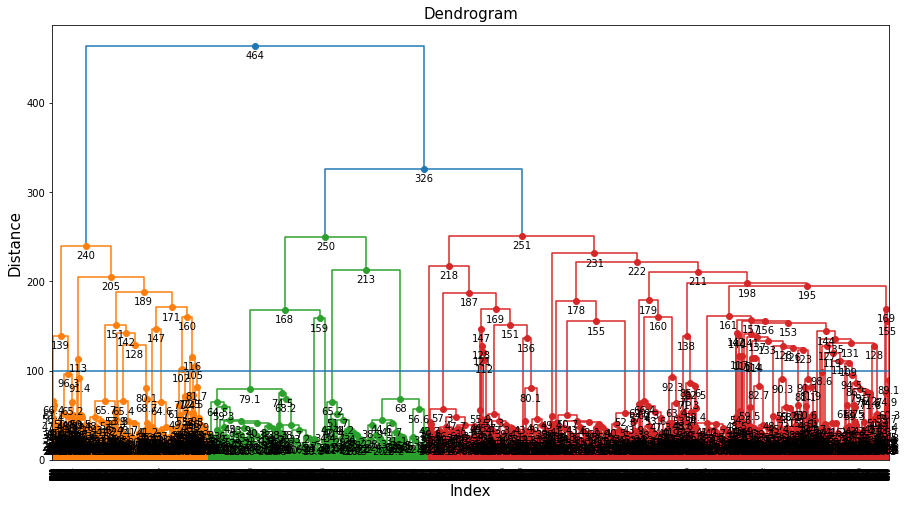

In [315]:
# plot the dendrogram
# pass the linkage matrix
dendro = dendrogram(link_mat)

# annotate the distance on the y-axis for distance > 20
# 'dendro' returns the dictionary containing x,y coordinates and the color list for each merge
# the 'icoord' returns the x-coordinates for the rectangle that represents the merging
# the 'dcoord' returns the y-coordinates (distance) for the each corner of the rectangle that represents the merging
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    
    # consider 'x' as the x-coordinate of the average distance on the merging line
    x = sum(i[1:3])/2
    
    # consider 'y' as the distance at which the merging occurs 
    y = d[1]
    
    # pass the if-condition for annotation
    if y > 20:
        
        # plot the bullet and annotate the merging distance 'y'
        plt.plot(x, y, 'o', c=c)
        
        # pass the conditions to annotate the distance
        plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')

        
# plot the line to cut the dendrogram
plt.axhline(y = 100)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Dendrogram', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)

# display the plot
plt.show()

#### Let us calculate the Cophenetic correlation coefficient to study the quality of clusters formed using dendrogram.

#### Let us calculate the Cophenetic correlation coefficient to study the quality of clusters formed using dendrogram.

In [342]:
# calculate the euclidean distance between the observations 
eucli_dist = euclidean_distances(svd1)

# the above code will return the matrix of 9813x9813
# consider only the array of upper triangular matrix
# k=1 considers the upper triangular values without the diagonal elements
dist_array = eucli_dist[np.triu_indices(9813, k = 1)]

# pass the linkage matrix and actual distance
# 1st output of the cophenet() is the correlation coefficient
coeff, cophenet_dist = cophenet(link_mat, dist_array)

# print the cophenetic correlation coefficient
print(coeff)

0.16188258137489955


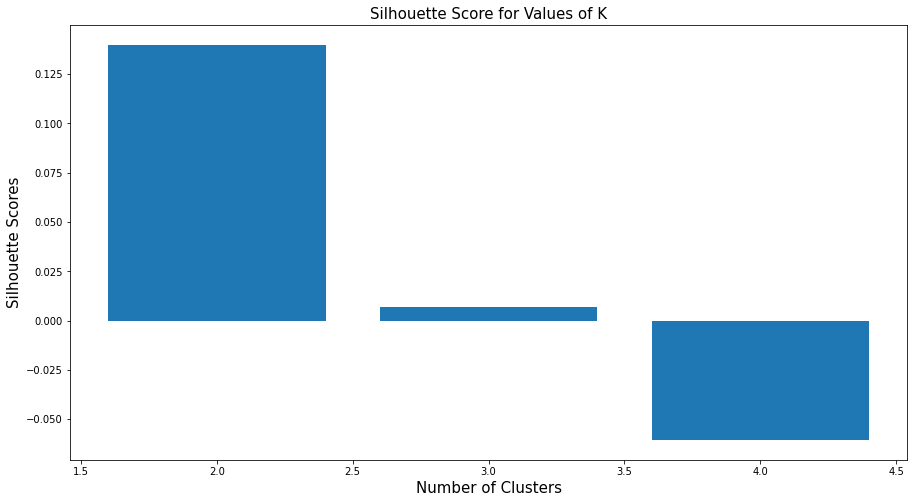

In [344]:
# consider different values of K
K = [2,3,4]

# consider an empty list tot store the Silhouette score
silhouette_scores = [] 

# consider a for loop to perform clustering for different values of K
for i in K:
    
    # instantiate clustering for each value of K
    model = AgglomerativeClustering(n_clusters = i) 
    
    # calculate the Silhouette score and append to the list 'silhouette_scores'
    silhouette_scores.append(silhouette_score(svd1, model.fit_predict(svd1))) 
    
# plot the Silhouette score for different K
plt.bar(K, silhouette_scores) 

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15) 
plt.ylabel('Silhouette Scores', fontsize = 15)

# display the plot
plt.show()

In [345]:
silhouette_scores

[0.1399734164776068, 0.006769197560086664, -0.06055706508350061]

Build the Model

In [360]:
# instantiate linkage object with scaled data and consider 'ward' linkage method 
link_mat = linkage(pca1, method = 'complete')     

# print first 10 observations of the linkage matrix 'link_mat'
print(link_mat[0:10])

[[1197.         2670.            0.00681691    2.        ]
 [ 414.         5270.            0.00936493    2.        ]
 [4678.         9803.            0.01268829    2.        ]
 [6609.         7357.            0.03693436    2.        ]
 [ 953.         5937.            0.11950192    2.        ]
 [4997.         6045.            0.13699119    2.        ]
 [4263.         6557.            0.16163968    2.        ]
 [2601.         7258.            0.16620647    2.        ]
 [4574.         5115.            0.19384784    2.        ]
 [1072.         1747.            0.26875176    2.        ]]


plot the dendrogram

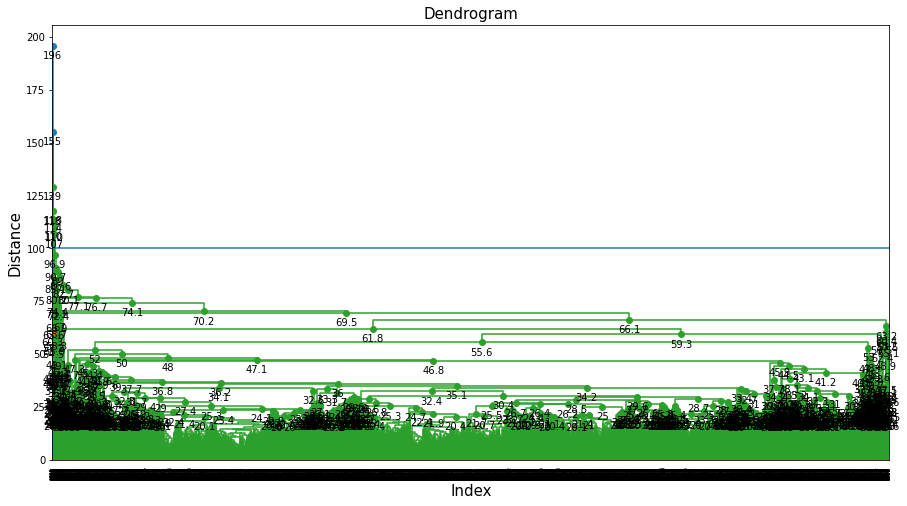

In [350]:
# plot the dendrogram
# pass the linkage matrix
dendro = dendrogram(link_mat)

# annotate the distance on the y-axis for distance > 20
# 'dendro' returns the dictionary containing x,y coordinates and the color list for each merge
# the 'icoord' returns the x-coordinates for the rectangle that represents the merging
# the 'dcoord' returns the y-coordinates (distance) for the each corner of the rectangle that represents the merging
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    
    # consider 'x' as the x-coordinate of the average distance on the merging line
    x = sum(i[1:3])/2
    
    # consider 'y' as the distance at which the merging occurs 
    y = d[1]
    
    # pass the if-condition for annotation
    if y > 20:
        
        # plot the bullet and annotate the merging distance 'y'
        plt.plot(x, y, 'o', c=c)
        
        # pass the conditions to annotate the distance
        plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')

        
# plot the line to cut the dendrogram
plt.axhline(y = 100)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Dendrogram', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)

# display the plot
plt.show()

In [361]:
# calculate the euclidean distance between the observations 
eucli_dist = euclidean_distances(pca1)

# the above code will return the matrix of 9813x9813
# consider only the array of upper triangular matrix
# k=1 considers the upper triangular values without the diagonal elements
dist_array = eucli_dist[np.triu_indices(9813, k = 1)]

# pass the linkage matrix and actual distance
# 1st output of the cophenet() is the correlation coefficient
coeff, cophenet_dist = cophenet(link_mat, dist_array)

# print the cophenetic correlation coefficient
print(coeff)

0.7801162805944722


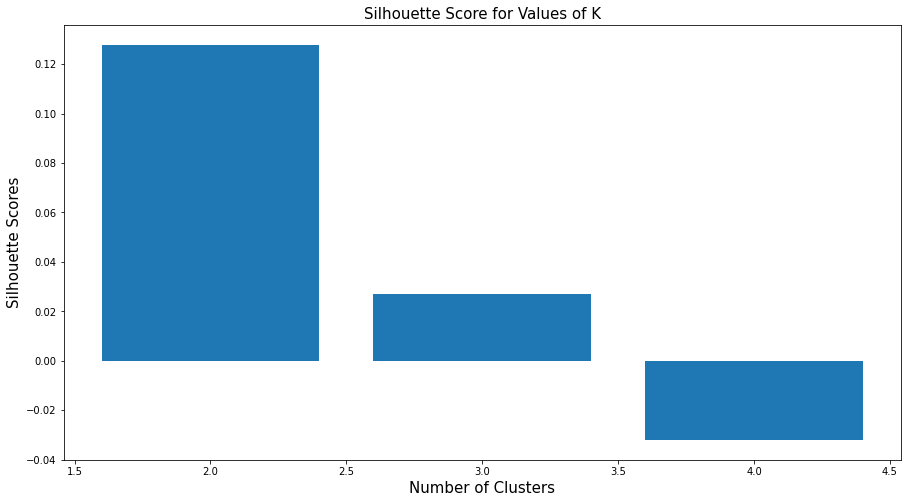

In [362]:
# consider different values of K
K = [2,3,4]

# consider an empty list tot store the Silhouette score
silhouette_scores = [] 

# consider a for loop to perform clustering for different values of K
for i in K:
    
    # instantiate clustering for each value of K
    model = AgglomerativeClustering(n_clusters = i) 
    
    # calculate the Silhouette score and append to the list 'silhouette_scores'
    silhouette_scores.append(silhouette_score(pca1, model.fit_predict(pca1))) 
    
# plot the Silhouette score for different K
plt.bar(K, silhouette_scores) 

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15) 
plt.ylabel('Silhouette Scores', fontsize = 15)

# display the plot
plt.show()

In [363]:
silhouette_scores

[0.1278715758432409, 0.027090570321852095, -0.03206283105038931]

Build the Model

In [355]:
# instantiate linkage object with scaled data and consider 'ward' linkage method 
link_mat = linkage(pca1, method = 'centroid')     

# print first 10 observations of the linkage matrix 'link_mat'
print(link_mat[0:10])

[[1197.         2670.            0.00681691    2.        ]
 [ 414.         5270.            0.00936493    2.        ]
 [4678.         9803.            0.01268829    2.        ]
 [6609.         7357.            0.03693436    2.        ]
 [ 953.         5937.            0.11950192    2.        ]
 [4997.         6045.            0.13699119    2.        ]
 [4263.         6557.            0.16163968    2.        ]
 [2601.         7258.            0.16620647    2.        ]
 [4574.         5115.            0.19384784    2.        ]
 [1072.         1747.            0.26875176    2.        ]]


plot the dendrogram

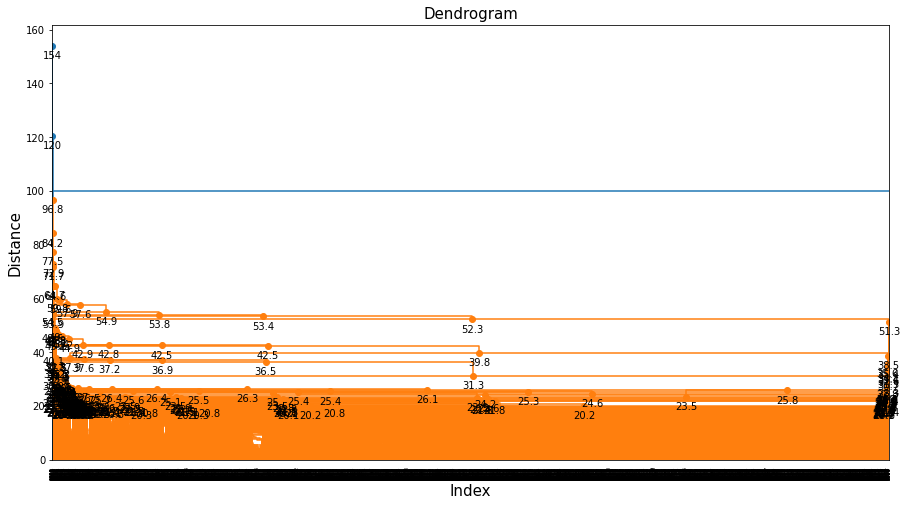

In [356]:
# plot the dendrogram
# pass the linkage matrix
dendro = dendrogram(link_mat)

# annotate the distance on the y-axis for distance > 20
# 'dendro' returns the dictionary containing x,y coordinates and the color list for each merge
# the 'icoord' returns the x-coordinates for the rectangle that represents the merging
# the 'dcoord' returns the y-coordinates (distance) for the each corner of the rectangle that represents the merging
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    
    # consider 'x' as the x-coordinate of the average distance on the merging line
    x = sum(i[1:3])/2
    
    # consider 'y' as the distance at which the merging occurs 
    y = d[1]
    
    # pass the if-condition for annotation
    if y > 20:
        
        # plot the bullet and annotate the merging distance 'y'
        plt.plot(x, y, 'o', c=c)
        
        # pass the conditions to annotate the distance
        plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')

        
# plot the line to cut the dendrogram
plt.axhline(y = 100)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Dendrogram', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)

# display the plot
plt.show()

In [357]:
# calculate the euclidean distance between the observations 
eucli_dist = euclidean_distances(pca1)

# the above code will return the matrix of 9813x9813
# consider only the array of upper triangular matrix
# k=1 considers the upper triangular values without the diagonal elements
dist_array = eucli_dist[np.triu_indices(9813, k = 1)]

# pass the linkage matrix and actual distance
# 1st output of the cophenet() is the correlation coefficient
coeff, cophenet_dist = cophenet(link_mat, dist_array)

# print the cophenetic correlation coefficient
print(coeff)

0.9286433160653134


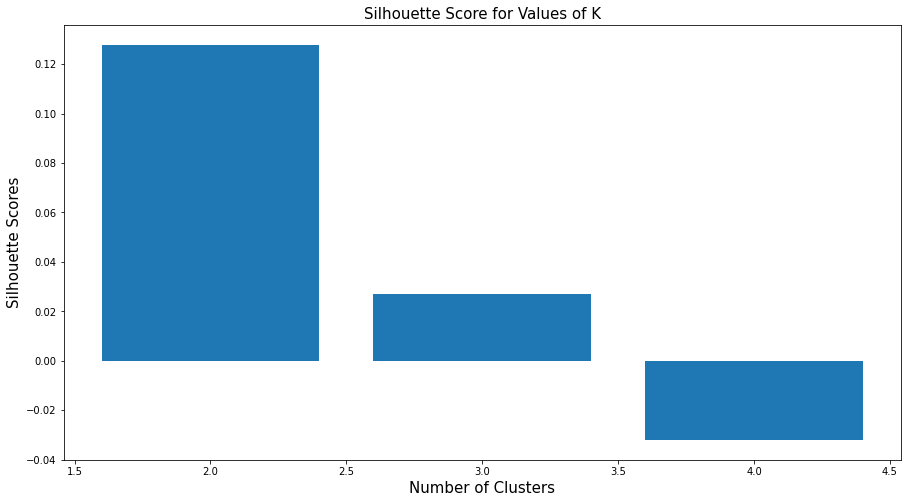

In [358]:
# consider different values of K
K = [2,3,4]

# consider an empty list tot store the Silhouette score
silhouette_scores = [] 

# consider a for loop to perform clustering for different values of K
for i in K:
    
    # instantiate clustering for each value of K
    model = AgglomerativeClustering(n_clusters = i) 
    
    # calculate the Silhouette score and append to the list 'silhouette_scores'
    silhouette_scores.append(silhouette_score(pca1, model.fit_predict(pca1))) 
    
# plot the Silhouette score for different K
plt.bar(K, silhouette_scores) 

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15) 
plt.ylabel('Silhouette Scores', fontsize = 15)

# display the plot
plt.show()

In [359]:
silhouette_scores

[0.1278715758432409, 0.027090570321852095, -0.03206283105038931]

## Overall Analysis

In [394]:
Scores = dict()

In [395]:
Scores = {'method':['ward (without pca)','ward (pca)','ward (svd)','complete(pca)','centroid(pca)'],'sil score':[0.131,0.128,0.14,0.128,0.128],'cophenet corr coeff':[0.155,0.173,0.162,0.78,0.93]}

In [397]:
Scores = pd.DataFrame(Scores)

In [402]:
Scores.index = Scores['method']
Scores.drop('method',axis=1,inplace=True)

In [409]:
Scores.sort_values(by='sil score',ascending=False)

,sil score,cophenet corr coeff
method,,
ward (svd),0.140,0.162
ward (without pca),0.131,0.155
ward (pca),0.128,0.173
complete(pca),0.128,0.780
centroid(pca),0.128,0.930


Based on above report it is clear that hierarchical clustering suggests max 2 clusters with 'ward' linkage method and 'svd' feature reduction method provides so far best silhoutte score